***certificate_quality_classifier_v2*** - *exploring math behind python functions and using them directly to understand foundational algorithms*
This time I went into foundational concepts of Logistic regression exploring actual logic behind model.
so before we explore Logistic regression, lets see what is linear regression.

**Linear Regression** : a simple relation between X and Y, where X is Feature and Y is outcome.
Formula is Y= m * X + c
whrere, m = (change in Y)/(change in X), weight
and c is bias or Intercept.

so Goal is to find best **m** and **c** based on test data so that we can use it to predict unkown Y later for new dataset.

also we need to minimize the difference between **actual value** and **predicted value** -> this is called training or model fitting

this is called Mean Squared Error (MSE) which is = (1/n) * sum of squares of difference between actual and predicted values.


**To find m and c:**

we can use below methods,
1. Analytical Method (closed form solution):first we will try this with sample then we will try gradient descent.
direct formula:
m=(n{sum[x*y]}-{sum[x]}*{sum[y]})/(n{sum[x**2]}-{sum[x]}**2)
c=({sum[y]}-m{sum[x]})/n

2. Gradient Descent (iterative method): We will try using this for our case since we have multiple features.
This is good if if we have multiple features x1, x2, x3, ... xn
method uses random values of m and c trying to reduce mean squared error.

Once we find optimal m and c, we can apply it for predictions.



In [1]:
import pandas as pd
import numpy as np
#lets now generate random test data.
np.random.seed(42)
data1 = pd.DataFrame({
    'cert_id': range(1000),
    'days_to_expiry': np.random.randint(0, 365, 1000),
    'purity_percent': np.random.uniform(50, 100, 1000),
    'vendor_score': np.random.uniform(1, 5, 1000)
})

#build a logic for only one feature initially to explore analystical method
conditions = [
    (data1['days_to_expiry'] < 200),  # Reject (0)
    (data1['days_to_expiry'] >= 200)  # Approve (1)
]

#define label, lets keep it as 0 and 1 for calculations
labels = [0, 1]

#apply condition and label on data
data1['actual_decision'] = np.select(conditions, labels)

#lets first build y=mx+c and define x and y 

X = data1['days_to_expiry']
y = data1['actual_decision']

#total number of features
n=data1.shape[0]

#lets use direct method to find optimal values for m and c with reduced MSE
#m=(n*{sum[X*y]}-{sum[X]}*{sum[y]})/(n*{sum[X**2]}-{sum[X]}**2)
#c=({sum[y]}-m*{sum[X]})/n
#Preprocess data to apply above formulas

sum_x = X.sum()
sum_y = y.sum()
sum_xy = (X * y).sum()
sum_x2 = (X**2).sum()
denominator = (n * sum_x2) - (sum_x**2)
numerator_m = (n * sum_xy) - (sum_x * sum_y)

#calculate m and c
m = numerator_m / denominator
c = (sum_y - m * sum_x) / n

#show optimal m and c
print(f"Optimal Slope (m): {m}")
print(f"Optimal Intercept (c): {c}")


Optimal Slope (m): 0.004098659872794093
Optimal Intercept (c): -0.29414039052487717


Now we have found m and c using analytcial method which has least MSE
now lets use this to predict and measure its accuracy against actual result. copied above code with updated seed so that this dataset would be different.

In [2]:
#lets now generate random test data again. I should have defined function to call but since it was easy to copy I have copied will finetune the code later versions
np.random.seed(62)
data2 = pd.DataFrame({
    'cert_id': range(1000),
    'days_to_expiry': np.random.randint(0, 365, 1000),
    'purity_percent': np.random.uniform(50, 100, 1000),
    'vendor_score': np.random.uniform(1, 5, 1000)
})

#build a logic for only one feature initially to explore analystical method
conditions = [
    (data2['days_to_expiry'] < 200),  # Reject (0)
    (data2['days_to_expiry'] >= 200)  # Approve (1)
]

#define label, lets keep it as 0 and 1 for calculations
labels = [0, 1]

#apply condition and label on data
data2['actual_decision'] = np.select(conditions, labels)

#lets first build y=mx+c and define x and y 

X = data2['days_to_expiry']
y= (X*m)+c
data2['predicted_decision']=y
Y_actual=data2['actual_decision']




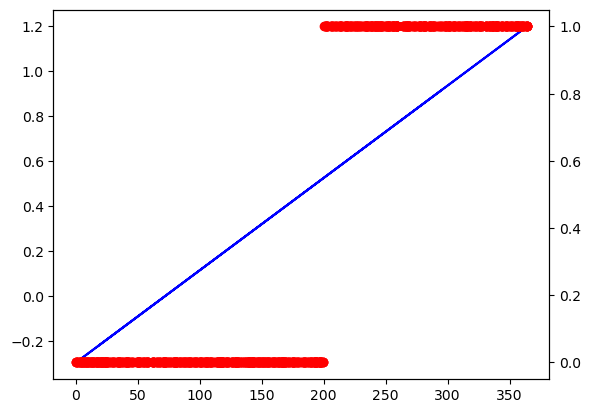

In [7]:
#lets plot values against predicted and actual outcome, need to import matplotlib now
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X,y,color='b')
ax2 = ax.twinx()
ax2.scatter(X,y,color='r')

#now we have found linear regression based on single feature. 
#now lets use it for logistic regression


with above found linear regression, we will try using sigmoid function to get logistic regression now using below,

so that we can just classify 0 or 1 based on linear regression values.

if you consider z as linear regression outcome, then logistic regression is,

= 1/(1-e**[-z])

e is special constant similar to pi.
e= 2.718...

which gives us probablity range between 0 to 1.

so now to optimize our binary classification we can try finding optimal threshold to approve or reject logic. (example if 0.5 is threshold then all values under 0.5 will be false and all values above 0.5 will be true, so usually 0.5 wont be thresold it would change based on our features so we need to find optimal threshold which we will do in next step.

0     0.445131
1     0.451213
2     0.509462
3     0.544186
4     0.690018
        ...   
95    0.753209
96    0.548249
97    0.525834
98    0.539098
99    0.579485
Name: days_to_expiry, Length: 100, dtype: float64


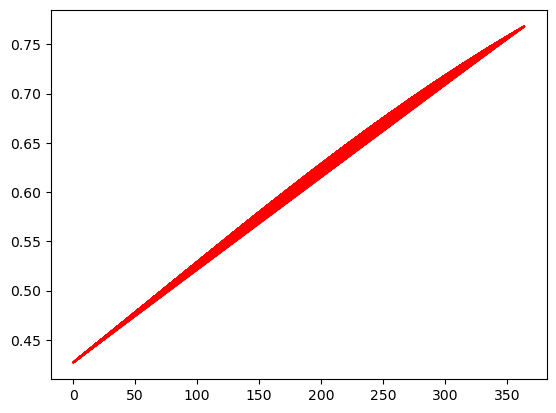

In [29]:
#lets treat y output from linear regression-> z and try to keep in range of 0 to 1

#preprocessing data
e=2.718281828459045235360287471352
z=y
neg_z=-1*z
e_pow_neg_z = e**neg_z
one_plus_e_pow_neg_z = 1+e_pow_neg_z

#as logistic regression is sigmoid function of linear regression
logistic_regression = 1/one_plus_e_pow_neg_z
fig, ax2 = plt.subplots()
ax2.plot(X,logistic_regression,color='r')
print(logistic_regression.head(100))


Now since we have found logistic regression, now we need to find a specific threshold which can help us to classify/predict the approve or reject outcome. so we will try calculating wit simple math first what kind of accuracy we can achieve 
and then we will try Gradient Descent to get find optimal m and c (to minimize MSE)

In [30]:

#lets initialize a variable to store highest accuracy
highest_accuracy = 0.0
final_threshold = 0.0
#lets try for loop with steps of 0.1 till 0.9 and print accuracies
for i in np.arange(0.0, 1.0, 0.1):
    conditions = [(logistic_regression < i),  # Reject (0)
                  (logistic_regression >= i)  # Approve (1)
                 ]
    #define label, lets keep it as 0 and 1 for calculations
    labels = [0, 1]
    #apply condition and label on data
    temp_df = np.select(conditions, labels)
    print(temp_df[:5])
    accuracy_found = (temp_df == Y_actual).mean()
    if accuracy_found > highest_accuracy:
        highest_accuracy = accuracy_found
        final_threshold = i
print(f"highest accuracy is :{highest_accuracy}")
print(f"best threshold through simple math is : {final_threshold}")

[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[0 0 1 1 1]
[0 0 0 0 1]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
highest accuracy is :0.922
best threshold through simple math is : 0.6000000000000001


Similarly, Now lets try gradient decent to find optimal thresold
cost function is our first step. J(theta0, theta1) = (1/2m)*(sum i=1->m ({h[x(ith)]}-{yith}))^2

In [31]:
# cost function calculation
# Note: np.mean() handles the (1/n) summation part.

# Term 1: y_actual * log(logistic_regression)
term1 = Y_actual * np.log(logistic_regression)

# Term 2: (1 - y_actual) * log(1 - logistic_regression)
term2 = (1 - Y_actual) * np.log(1 - logistic_regression)

# mean of the sum and negate it
cost_J = -np.mean(term1 + term2)

print(f"The Log Loss Cost (J) is: {cost_J:.4f}")

The Log Loss Cost (J) is: 0.5875


In [32]:
# Now concept of gradient descent is to start with smallest value possible
#and keep taking small steps to reduce cost function until you reach deepest bottom and cannot take any more steps which is less
learning_rate = 0.0001  
epochs = 5000           # Number of iterations


# Initialize m and c
m = 0.0
c = 0.0

# gradient descent loop
for epoch in range(epochs):
    
    # calculate logistic regression
    z = m * X + c
    LR = 1 / (1 + np.exp(-z))
    
    # calculate the gradients
    error = LR - Y_actual
    
    # gradient for slope (m)
    grad_m = np.mean(error * X)
    
    # gradient for intercept (c)
    grad_c = np.mean(error)
    
    # update parameters
    m = m - learning_rate * grad_m
    c = c - learning_rate * grad_c
    
    # monitor cost founction
    if (epoch + 1) % 500 == 0:
        cost_J = -np.mean(Y_actual * np.log(LR) + (1 - Y_actual) * np.log(1 - LR))
        print(f"Epoch {epoch + 1}: Cost J = {cost_J:.4f}")

# --- FINAL RESULTS ---
print("\n--- Training Complete ---")
print(f"Optimal Slope (m): {m:.6f}")
print(f"Optimal Intercept (c): {c:.6f}")
print(f"Final Log Loss Cost: {cost_J:.4f}")

Epoch 500: Cost J = 0.6431
Epoch 1000: Cost J = 0.6410
Epoch 1500: Cost J = 0.6389
Epoch 2000: Cost J = 0.6368
Epoch 2500: Cost J = 0.6347
Epoch 3000: Cost J = 0.6326
Epoch 3500: Cost J = 0.6306
Epoch 4000: Cost J = 0.6286
Epoch 4500: Cost J = 0.6265
Epoch 5000: Cost J = 0.6245

--- Training Complete ---
Optimal Slope (m): 0.003556
Optimal Intercept (c): -0.101730
Final Log Loss Cost: 0.6245


0     0.490570
1     0.495903
2     0.546440
3     0.576200
4     0.700082
        ...   
95    0.754265
96    0.579670
97    0.560499
98    0.571853
99    0.606268
Name: days_to_expiry, Length: 100, dtype: float64
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[0 0 1 1 1]
[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 0]
[0 0 0 0 0]
highest accuracy is :0.833
best threshold through simple math is : 0.6000000000000001


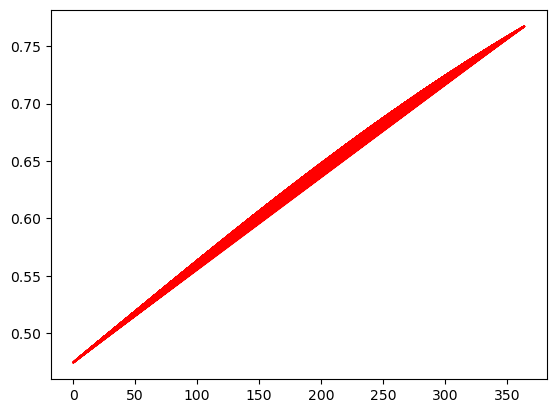

In [33]:
import pandas as pd
import numpy as np
#lets now generate random test data again. I should have defined function to call but since it was easy to copy I have copied will finetune the code later versions
np.random.seed(62)
data3 = pd.DataFrame({
    'cert_id': range(1000),
    'days_to_expiry': np.random.randint(0, 365, 1000),
    'purity_percent': np.random.uniform(50, 100, 1000),
    'vendor_score': np.random.uniform(1, 5, 1000)
})

#build a logic for only one feature initially to explore analystical method
conditions = [
    (data3['days_to_expiry'] < 250),  # Reject (0)
    (data3['days_to_expiry'] >= 250)  # Approve (1)
]

#define label, lets keep it as 0 and 1 for calculations
labels = [0, 1]

#apply condition and label on data
data3['actual_decision'] = np.select(conditions, labels)

#lets first build y=mx+c and define x and y 

X = data2['days_to_expiry']
y= (X*m)+c
data2['predicted_decision']=y
Y_actual=data2['actual_decision']

#lets treat y output from linear regression-> z and try to keep in range of 0 to 1

#preprocessing data
e=2.718281828459045235360287471352
z=y
neg_z=-1*z
e_pow_neg_z = e**neg_z
one_plus_e_pow_neg_z = 1+e_pow_neg_z

#as logistic regression is sigmoid function of linear regression
logistic_regression = 1/one_plus_e_pow_neg_z
fig, ax2 = plt.subplots()
ax2.plot(X,logistic_regression,color='r')
print(logistic_regression.head(100))


#lets initialize a variable to store highest accuracy
highest_accuracy = 0.0
final_threshold = 0.0
#lets try for loop with steps of 0.1 till 0.9 and print accuracies
for i in np.arange(0.0, 1.0, 0.1):
    conditions = [(logistic_regression < i),  # Reject (0)
                  (logistic_regression >= i)  # Approve (1)
                 ]
    #define label, lets keep it as 0 and 1 for calculations
    labels = [0, 1]
    #apply condition and label on data
    temp_df = np.select(conditions, labels)
    print(temp_df[:5])
    accuracy_found = (temp_df == Y_actual).mean()
    if accuracy_found > highest_accuracy:
        highest_accuracy = accuracy_found
        final_threshold = i
print(f"highest accuracy is :{highest_accuracy}")
print(f"best threshold through simple math is : {final_threshold}")

**Let me experiment with actual Python packages instead of math functions and try to add more features in next version of Learning**